In [2]:
import matplotlib.pyplot as plt
import numpy as np

## Fast hist

In [3]:
from typing import List, Tuple, Union


def fast_hist(array: List[Union[int, float]],
              bins: int) -> Tuple[List[int], List[float]]:
    """
    Builds bins' labels and bins' value counts for given array
    :param array: array with numeric values
    :param bins:  number of bins in result distribution
    :return: Two lists:
             first contains value counts of each bin,
             second contains list of bins' labels
    """
    _min = min(array)
    _max = max(array)

    if _min == _max:
        return [len(array)], [_min - 0.5, _min + 0.5]

    bin_size = (_max - _min) / bins
    el_to_bin_index = [
        int((x - _min) // bin_size) + (-1 if x != _min and (x - _min) % bin_size == 0 or x == _max else 0) for x in
        array]

    res1 = np.zeros(bins)
    for i in range(len(array)):
        res1[el_to_bin_index[i]] += 1

    res2 = np.arange(0, bins + 1) * bin_size + _min
    return res1, res2

Значения колонок: [ 2.  0.  1.  0.  1.  1.  3.  3.  4.  3.  8.  5.  9. 16. 17. 22. 18. 34.
 25. 42. 41. 43. 50. 58. 43. 55. 45. 58. 49. 43. 49. 47. 42. 26. 29. 15.
 17. 20. 10.  8.  8.  9.  6.  4.  4.  3.  0.  0.  2.  2.]
Названия колонок: [-1.68642234e+01 -1.62153108e+01 -1.55663981e+01 -1.49174855e+01
 -1.42685728e+01 -1.36196602e+01 -1.29707475e+01 -1.23218349e+01
 -1.16729223e+01 -1.10240096e+01 -1.03750970e+01 -9.72618433e+00
 -9.07727168e+00 -8.42835904e+00 -7.77944640e+00 -7.13053375e+00
 -6.48162111e+00 -5.83270847e+00 -5.18379582e+00 -4.53488318e+00
 -3.88597054e+00 -3.23705789e+00 -2.58814525e+00 -1.93923261e+00
 -1.29031996e+00 -6.41407320e-01  7.50532296e-03  6.56417966e-01
  1.30533061e+00  1.95424325e+00  2.60315590e+00  3.25206854e+00
  3.90098118e+00  4.54989383e+00  5.19880647e+00  5.84771911e+00
  6.49663176e+00  7.14554440e+00  7.79445704e+00  8.44336969e+00
  9.09228233e+00  9.74119497e+00  1.03901076e+01  1.10390203e+01
  1.16879329e+01  1.23368455e+01  1.29857582e

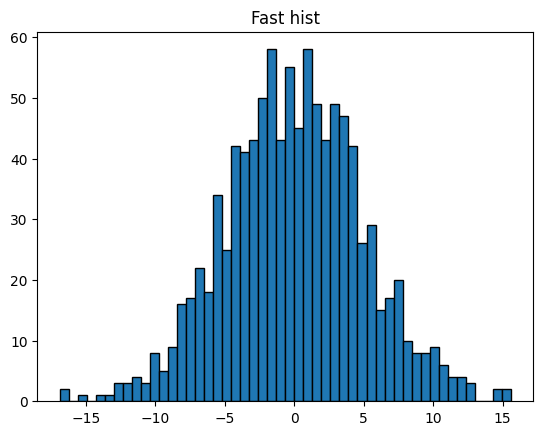

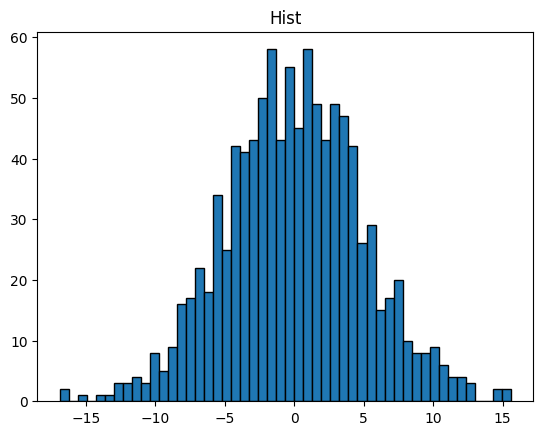

In [10]:
array = np.random.normal(0, 5, 1000)
n = 50

value_counts, bins_names = fast_hist(array, n)

print('Значения колонок:', value_counts)
print('Названия колонок:', bins_names)

plt.bar(bins_names[:-1], value_counts, width=bins_names[1] - bins_names[0], align='edge', edgecolor='black',
        linewidth=1)
plt.title('Fast hist')
plt.show()
plt.hist(array, n, edgecolor='black', linewidth=1)
plt.title('Hist')
plt.show()

In [11]:
%%timeit
fast_hist(array, n)

1.36 ms ± 145 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


44.7 ms ± 5.42 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


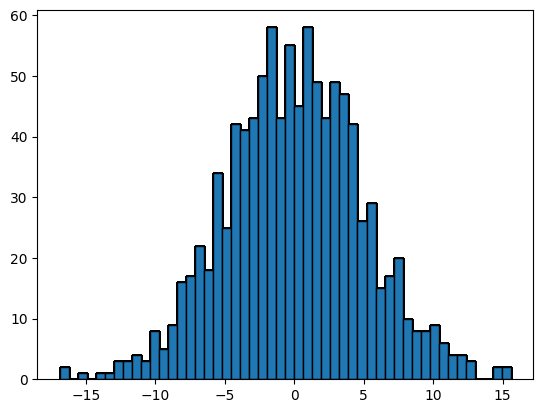

In [12]:
%%timeit
plt.hist(array, n, edgecolor='black', linewidth=1)